In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import numpy as np

import mplhep as hep
plt.style.use(hep.style.CMS)

In [14]:
"""
This function plots the current versus integrated charge.

The first argument is the name of the csv file with the data, either data with ohmic current or data with physics current.
An example of this file is included on this repository.

The second argument is the gap name, e.g. 'bot' or 'top'. 

"""


def plot_current_intcharge(file, gap):
    
    # Read the csv file as a panda dataframe
    df = pd.read_csv(file)
    # Takes the currents
    current = df['current_' + gap + '(uA)'].astype(float) # In Micro Amperes
    integrated_charge = df['integrated_charge_' + gap + '(mC/cm^2)'].astype(float) 
        
    # Figure and axis
    fig, ax = plt.subplots()
    # Attributes xaxis and yaxis
    
    ax.plot(integrated_charge, current, marker='s', linestyle=None, linewidth=0)
    #plt.errorbar(vo, ef, yerr=er, marker='*', linestyle='', label=leg), #marker='.', linestyle=None, linewidth=0)
    #ax.legend()
    
    # Xlabel
    ax.xaxis.set_label_coords(0.5, -0.055)
    ax.set_xlabel(r'integrated charge $[mC/cm^2]$', fontsize = 22)

    # Ylabel
    ax.yaxis.set_label_coords(-0.09, 0.86)
    ax.set_ylabel(file.partition("_")[0] + r' current $[\mu A]$ ', fontsize = 22)
    #plt.legend('labels')

    # CMS format
    hfont = {'fontname':'Helvetica'}    
    plt.text(0.17, 0.89, "CMS", fontdict=hfont,  fontweight='bold', transform=plt.gcf().transFigure) # Value for on top: 0.17, 0.89, inside plot: 0.17, 0.80
    plt.text(0.27, 0.89, "Preliminary", fontdict=hfont, style='italic',fontsize = 22, transform=plt.gcf().transFigure) # Value for on top: 0.27, 0.89, inside plot: 0.27, 0.80

    # Remove scientific notation
    ax.ticklabel_format(useOffset=False , style='plain')
    ### If ones would like to move the scientific notation
    #t = ax.yaxis.get_offset_text()
    #t.set_x(0.008)

    plt.grid()
    plt.savefig(file.partition(".csv")[0] + "_VS_integrated_charge_" + gap + ".png")

In [16]:
# Ohmic currents
file = 'ohmic_current.csv'
plot_current_intcharge(file, 'bot')
plot_current_intcharge(file, 'top')

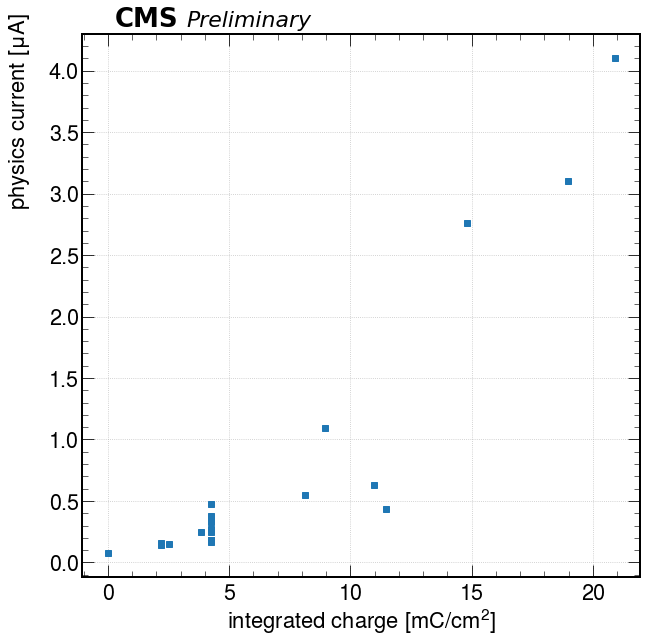

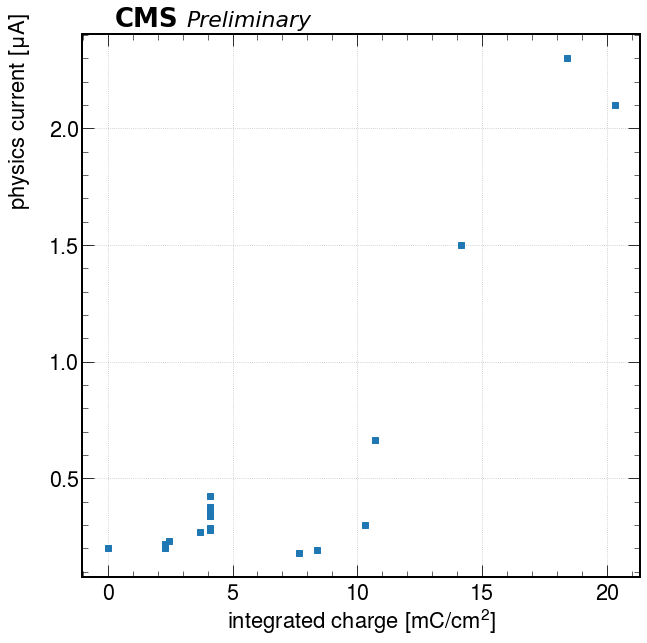

In [18]:
# Physic currents
file = 'physics_current.csv'
plot_current_intcharge(file, 'bot')
plot_current_intcharge(file, 'top')